# 1a

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

%matplotlib inline

# config
samples = 100
z = np.linspace(0.0,5.0,samples)
z1 = np.linspace(0.0,1000.0,1000)

# constants
H0 = 72.0 # [km/s/Mpc]
omegaM = 0.27
omegaL = 0.73
omegaR = 8.4E-5
c = 2.998E5 # [km/s]
K = 0.0

# calculated constants
D_H = c/H0

# functions
def E_of_Z(z):
    E_z = np.power(( (omegaR*np.power((1.0+z),4.0)) + (omegaM*np.power((1.0+z),3.0)) + omegaL ),0.5)
    return E_z

# integrating function
function = lambda z: D_H/E_of_Z(z)

D_c = []

for i in range(samples):
    answer = integrate.quad(function, 0.0, 5.0*((i+0.0)/samples))
    D_c.append(answer[0])

D_A = D_c/(1+z)
D_L = D_c*(1+z)   
    
# imported data
d1 = np.genfromtxt('hubble1.dat', skip_header=1, usecols=(2))
v1 = np.genfromtxt('hubble1.dat', skip_header=1, usecols=(3))
d2 = np.genfromtxt('hubble2.dat', skip_header=1, usecols=(4))
v2_0 = np.genfromtxt('hubble2.dat', skip_header=1, usecols=(5))
d2_0 = np.genfromtxt('hubble2.dat', skip_header=1, usecols=(4))
v2 = range(len(v2_0))

# sorting data by distance
d2.sort()
for i in range(len(d2)):
    for j in range(len(d2)):
        if d2_0[j] == d2[i]:
            v2[i] = v2_0[j]

d3 = np.genfromtxt('hubble2_1.dat', skip_header=1, usecols=(4))
v3 = np.genfromtxt('hubble2_1.dat', skip_header=1, usecols=(5))

[ 453.85999408  -40.43600878]


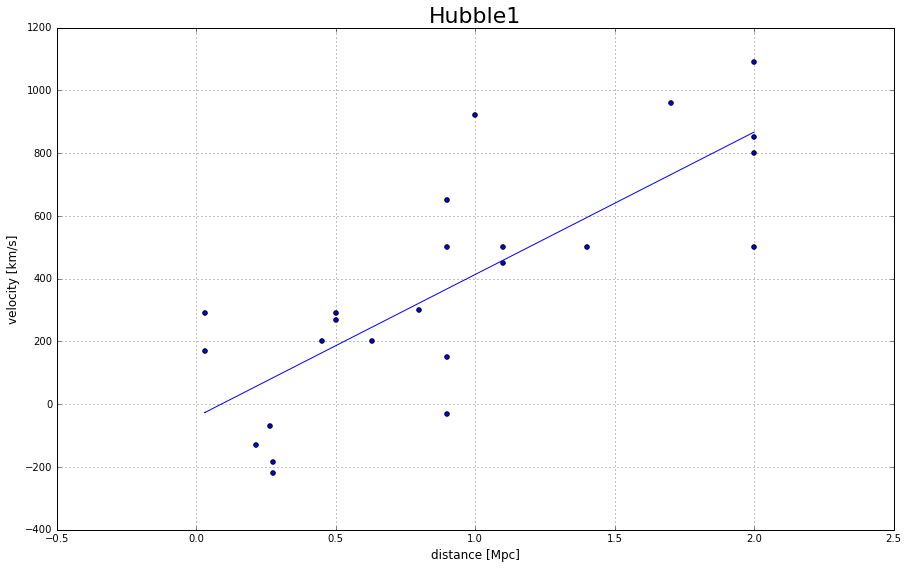

In [2]:
print np.polyfit(d1, v1, 1)

plt.figure(figsize=(15,9))
plt.scatter(d1, v1)
plt.plot(d1, np.poly1d(np.polyfit(d1, v1, 1))(d1))
plt.grid(True)
plt.xlabel('distance [Mpc]',fontsize=12)
plt.ylabel('velocity [km/s]',fontsize=12)
plt.title('Hubble1',fontsize=22)
plt.show()

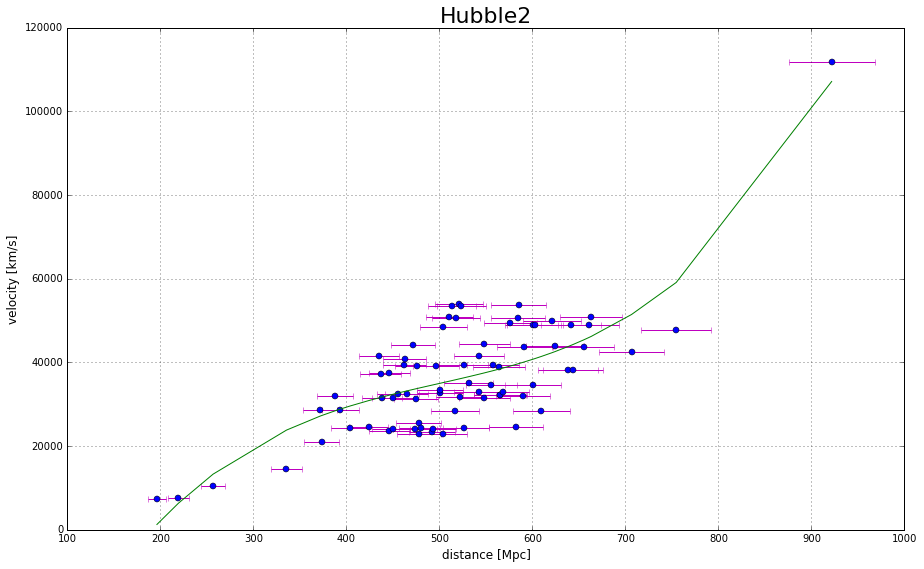

In [3]:
plt.figure(figsize=(15,9))
plt.errorbar(d2, v2, xerr=d2*0.05, fmt='o', ecolor='m')
plt.plot(d2, np.poly1d(np.polyfit(d2, v2, 3))(d2))
plt.grid(True)
plt.xlabel('distance [Mpc]',fontsize=12)
plt.ylabel('velocity [km/s]',fontsize=12)
plt.title('Hubble2',fontsize=22)
plt.show()

[   75.19946889 -3122.05963258]


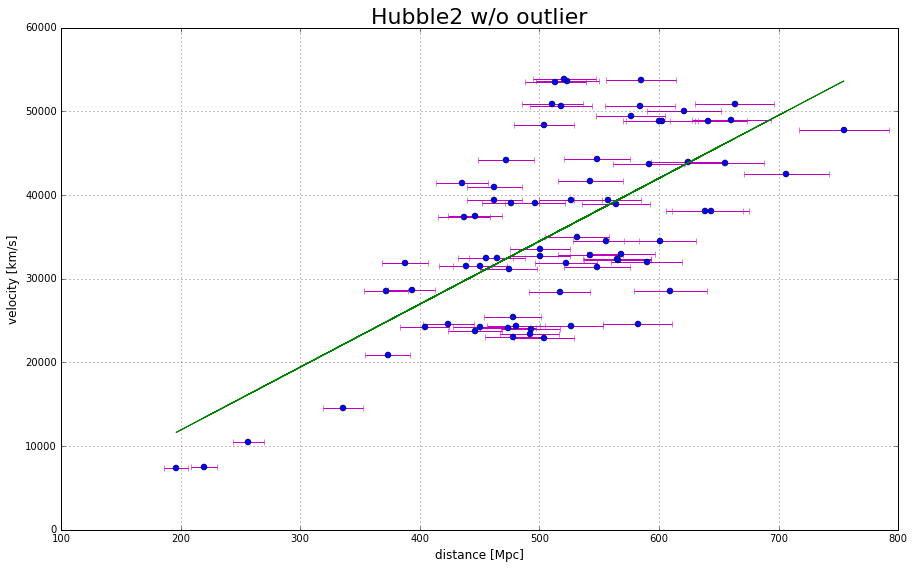

In [4]:
print np.polyfit(d3, v3, 1)

plt.figure(figsize=(15,9))
#plt.scatter(d3, v3)
plt.errorbar(d3, v3, xerr=d3*0.05, fmt='o', ecolor='m')
plt.plot(d3, np.poly1d(np.polyfit(d3, v3, 1))(d3))
plt.grid(True)
plt.xlabel('distance [Mpc]',fontsize=12)
plt.ylabel('velocity [km/s]',fontsize=12)
plt.title('Hubble2 w/o outlier',fontsize=22)
plt.show()

# 1b
#### Since the redshift, or the velocities are measured spectroscopy, and does not depend on the complicating factors which may affect the distance measurement. Therefore, the distance axis is much more difficult to determine, this where most of the uncertainty lies.

# 1c
#### Yes, you can conclude that the expansion rate is a constant as you go further away the universe expands more rapidly. The diagram would look like an exponential.

# 2a
### Parsec is ok for Newtonian. MegaParsec  are GR

# 2b
##### $r = x*a(t)$
##### $F= -\frac{Gmm}{r^2}=-\frac{Gmm}{(xa(t))^2}=mx\ddot{a} $
##### $\ddot{r}=x\ddot{a}$
##### $\rho = \frac{m}{4/3 \pi r^3}= \frac{m}{4/3 \pi x^3a^3(t)}$
##### $M= \frac{4\pi \rho x^3a^3(t)}{3}$
### $\ddot{a}=-\frac{4G\pi \rho x^3a^3(t)}{3x^3a^2(t)}=-\frac{4G\pi \rho(t) a(t)}{3}$

# 2c
##### $\dot{a}\ddot{a}=-\frac{4G\pi \rho a}{3}\dot{a}$
##### $\int \dot{a}~d\dot{a}=-\int \frac{4G\pi \rho a}{3}~d\dot{a}$
##### $\int \dot{a}~d\dot{a}=- \frac{MG}{x^3} \int \frac{1}{a^2} ~d\dot{a}$
##### $\frac{1}{2} \dot{a}^2= +\frac{MGa^{-1}}{x^3}+c$
##### $\frac{1}{2} \dot{a}^2= +\frac{4\rho \pi a^3x^3}{3} \frac{G}{x^3a}+c$
### $\dot{a}^2= +\frac{8G\rho \pi a^2}{3}+c$

# 2d
##### When I change my integration constant from positive to negative or when k is positive $\dot{a}$ is positive, $\dot{a}$ must always be positive. Unless K is sufficiently negative, then it is imaginary.

# 2e
#### when k=0, $\rho = \rho_{cr}$,$\frac{\dot{a}}{a}=H_0$, $H(t_0)=H_0$
#### $H_0 - \frac{8G\rho_{cr} \pi }{3}$ $\rightarrow$ $\rho_{cr}=\frac{3H_0^2}{8\pi G}$ 
#### what it stands for if is the current density of the universe now


# 2f
#### $\rho \approx \rho_{matter} c_{matter}^2 \ll \rho c_{speed of light}^2$ pressure free
#### Pressure-Free Matter. The pressure in a gas is determined by the thermal motion of its constituents. At room temperature, molecules in the air move at a speed comparable to the speed of sound, cs ∼ 300 m/s. For such a gas, P ∼ ρ c2 gravitationally completely insignificant. In cosmology, a substance with P ρc2 is denoted as (pressure-free) matter, also called cosmological dust.2 We approximate Pm = 0, where the index “m” stands for matter. The constituents of the (pressure-free) matter move with velocities much smaller than c.

# 2g
#### $\rho_{matter}\thicksim a(t)^{-3},\rho_{radiation}\thicksim a(t)^{-4}\rho_{vacumm}\thicksim 1$
#### $\frac{\dot{a}}{a}^2= α^2a^{−4} + β^2a^{−3} − Ka^{−2} +\frac{1}{3}\lambda$
#### $\frac{\dot{a}}{a}^2= \rho_ra^{−4} + \rho_ma^{−3}− Ka^{−2} +\rho_{\lambda}$
#### $\rho_m=\frac{\frac{\dot{a}}{a}^2-\rho_ra^{−4}-\rho_{\lambda}+ Ka^{−2}}{a^{−3}}$
#### $\rho_{matter}(t) = \rho_{m,0}{a(t)}^{-3} $


# 2h
#### $H^2=\frac{8πG(ρ_m + ρ_r )}{3}-\frac{kc^2}{a^2}+\frac{\lambda}{3}$
#### $H^2=\frac{8πG(\frac{ρ_m}{a^3} + \frac{ρ_r}{a^4} )}{3}-\frac{kc^2}{a^2}+\frac{\lambda}{3}$
#### $H^2=H_0^2(\frac{\Omega_m}{a^3} + \frac{\Omega_r}{a^4}+\frac{\Omega_k}{a^2}+\Omega_{\lambda} )$
#### $\Omega_m + \Omega_r+\Omega_k+\Omega_{\lambda}=1 $

# 2i
#### $H^2=H_0^2(\frac{\Omega_m}{a^3} + \frac{\Omega_r}{a^4}+\frac{\Omega_k}{a^2}+\Omega_{\lambda} )$
#### $H^2=H_0^2(\frac{\Omega_m}{a^3} + \frac{1-\Omega_m}{a^2})$
#### $H^2=H_0^2(1+z)^2(\Omega_m(1+z)+1-\Omega_m) $
#### $H(z)=H_0(1+z)\sqrt{1+\Omega_mz}$
#### $H(z) = H_{0}E(z)$
#### $H_{0}E(z)=H_0(\Omega_m(1+z)^3+\Omega_{\lambda}+(1-\Omega_m-\Omega_{\lambda})(1+z)^2)^{1/2}$
#### $H(z) = H_0{E(z)} =H_0\sqrt{\Omega_r({\frac{1}{1+z}})^{-4} + \Omega_m({\frac{1}{1+z}})^{-3} - {\frac{Kc^{2}}{{H_0}^{2}}({\frac{1}{1+z}})^{-2} + \Omega_\Lambda}                            }$


# 3a
#### $t_{Hubble}=\frac{1}{68*}\frac{Mpc*sec}{km} =4.538\times 10^{17} sec \times \frac{1~ year}{\pi \times 10^7 sec}=14.4 ~billion~years$
#### $t_{Hubble}=14.4 ~billion~years$

# 3b
#### $aH(a)= \frac{\dot{a}}{a}$ solve for t;$dt=\frac{da}{\dot{a}} \rightarrow dt=\frac{da}{aH(a)}\rightarrow \int dt=\int \frac{da}{aH(a)}$
#### for $\Omega_r=0 ~~\Omega_{\lambda}=0 ~~\Omega_m=0 ~~A=1$
#### $t=\int_0^A \frac{da}{aH_0\sqrt{a^{-4}*0+a^{-3}*0+a^{-2}*(1-0-0)+0}}=\int_0^A \frac{da}{aH_0\sqrt{a^{-2}}}=\int_0^A \frac{ada}{aH_0}=\frac{a}{H_0}= 14.4~billion~years $
#### for $\Omega_r=0 ~~\Omega_{\lambda}=0 ~~\Omega_m=1 ~~A=1$
#### $t=\int_0^A \frac{da}{aH_0\sqrt{a^{-4}*0+a^{-3}*1+a^{-2}*(1-1-0)+0}}=\int_0^A \frac{\sqrt{a}da}{H_0}=\frac{1}{H_0}\int_0^A a^{1/2}da=\frac{2A^{3/2}}{3H_0}=\frac{2*1}{3H_0}=9.6~billion~years$

# 3c
#### $t=\int_0^A \frac{da}{aH_0\sqrt{a^{-4}*0+a^{-3}*.27+a^{-2}*(1-.27-0)+0}}=\int_0^A \frac{da}{aH_0\sqrt{a^{-3}*.27+a^{-2}*.73}}=\int_0^A \frac{ada}{aH_0\sqrt{a^{-1}*.27+.73}}=\int_0^A \frac{da}{H_0\sqrt{a^{-1}*.27+.73}}=\frac{.82}{H_0}=11.8~ billion~ years$
#### I can see why the "age problem" with pure matter model is because the time was too short.

# 4a

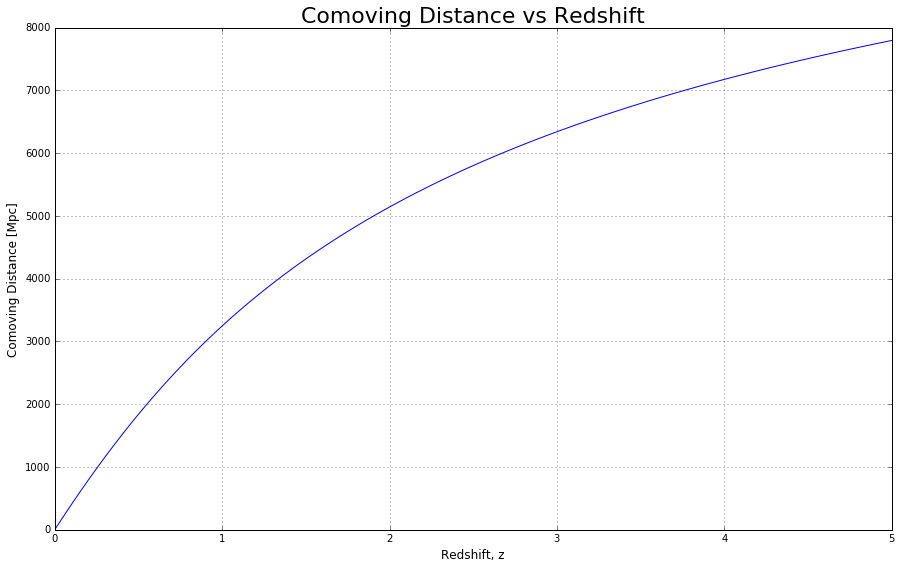

In [5]:
#4a
plt.figure(figsize=(15,9))
plt.plot(z, D_c)
plt.grid(True)
plt.xlim(0,5)
plt.ylim(0,8000)
plt.xlabel('Redshift, z',fontsize=12)
plt.ylabel('Comoving Distance [Mpc]',fontsize=12)
plt.title('Comoving Distance vs Redshift',fontsize=22)
plt.show()

# 4b
### Compared to the angular diameter distance, it should have been two extra redshift factors fo about 1 + z but i could not show it.

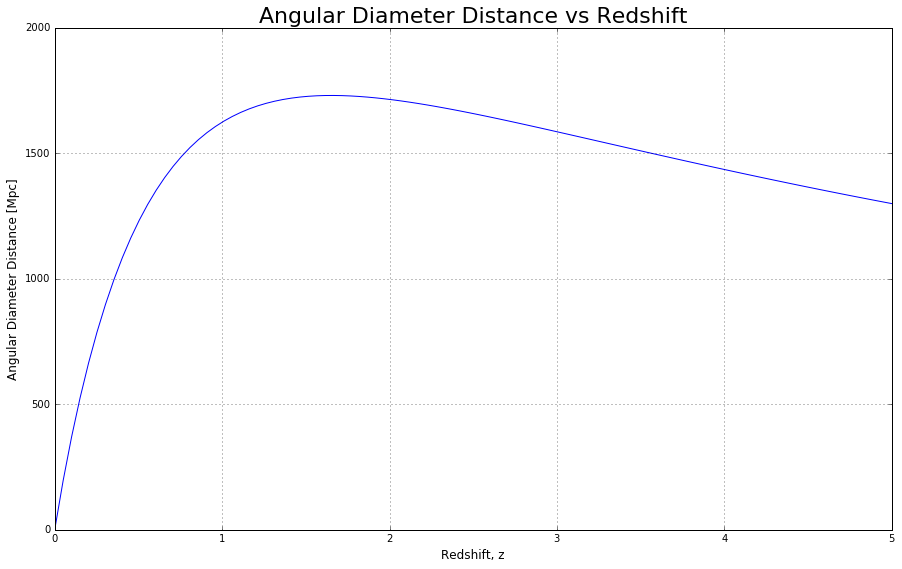

In [6]:
#4b
plt.figure(figsize=(15,9))
plt.plot(z, D_A)
plt.grid(True)
plt.xlim(0,5)
plt.ylim(0,2000)
plt.xlabel('Redshift, z',fontsize=12)
plt.ylabel('Angular Diameter Distance [Mpc]',fontsize=12)
plt.title('Angular Diameter Distance vs Redshift',fontsize=22)
plt.show()

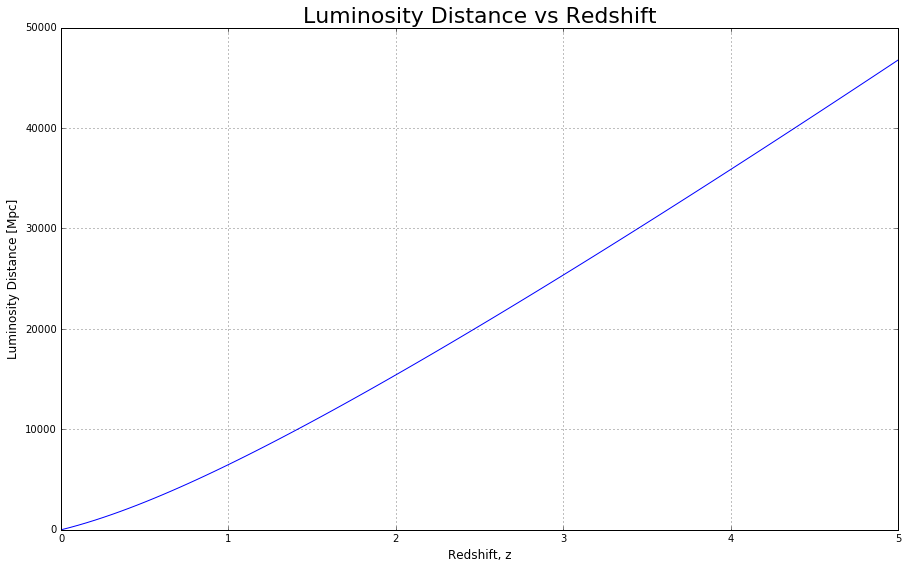

In [7]:
#4b
plt.figure(figsize=(15,9))
plt.plot(z, D_L)
plt.grid(True)
plt.xlim(0,5)
plt.ylim(0,50000)
plt.xlabel('Redshift, z',fontsize=12)
plt.ylabel('Luminosity Distance [Mpc]',fontsize=12)
plt.title('Luminosity Distance vs Redshift',fontsize=22)
plt.show()

# 4c

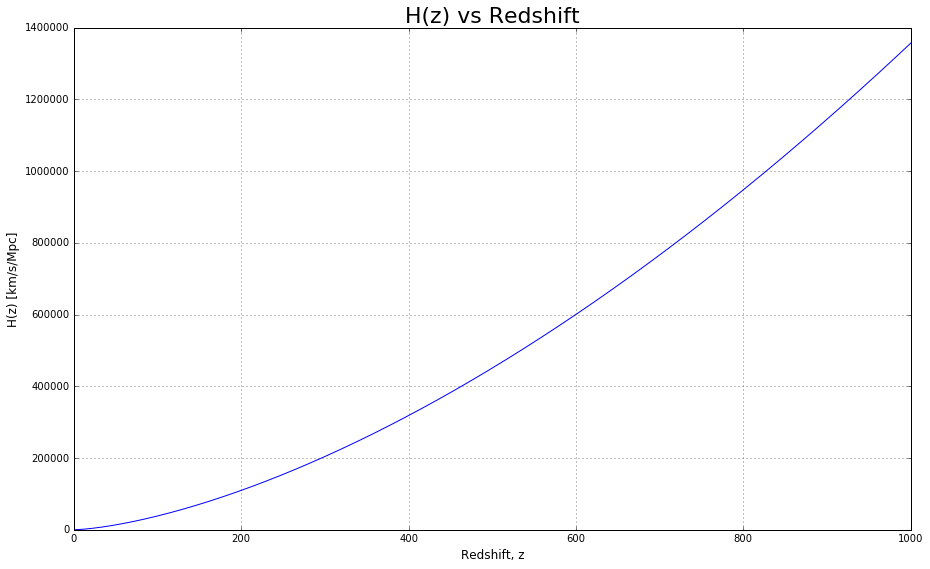

In [8]:
#4c
plt.figure(figsize=(15,9))
plt.plot(z1, H0*E_of_Z(z1))
plt.grid(True)
plt.xlim(0,1000)
plt.ylim(0,1400000)
plt.xlabel('Redshift, z',fontsize=12)
plt.ylabel('H(z) [km/s/Mpc]',fontsize=12)
plt.title('H(z) vs Redshift',fontsize=22)
plt.show()